# 对死刑数据的机器学习预测

In [1]:
# 加载基本库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#读取数据
df = pd.read_csv('../data/all_encoded.csv')
df.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed
0,1,4,49,1,1977,1,17,1
1,1,2,12,1,1979,5,25,1
2,1,3,32,1,1979,10,22,1
3,1,2,18,1,1981,3,9,1
4,1,2,51,1,1982,8,10,1


In [3]:
# 将Year, Month, Day合并为Date列，并转换为datetime格式
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed,Date
0,1,4,49,1,1977,1,17,1,1977-01-17
1,1,2,12,1,1979,5,25,1,1979-05-25
2,1,3,32,1,1979,10,22,1,1979-10-22
3,1,2,18,1,1981,3,9,1,1981-03-09
4,1,2,51,1,1982,8,10,1,1982-08-10


In [4]:
# 查看Date列中的缺失数据数量
missing_dates = df['Date'].isna().sum()
print(f"Date列中缺失的数据数量: {missing_dates}")
# 删除Date列中缺失数据的行
df = df.dropna(subset=['Date'])
print(f"删除缺失Date后的数据量: {len(df)}")


Date列中缺失的数据数量: 38
删除缺失Date后的数据量: 13737


模型准确率: 0.576783114992722

分类报告:
               precision    recall  f1-score   support

           1       0.73      0.72      0.72      1752
           2       0.22      0.22      0.22       159
           3       0.00      0.00      0.00         1
           4       0.48      0.39      0.43        36
           5       0.20      0.50      0.29         2
           6       0.57      0.60      0.59        20
           7       0.75      0.86      0.80         7
           8       0.80      0.83      0.82        24
           9       0.88      1.00      0.93         7
          10       0.38      0.36      0.37       479
          11       0.03      0.04      0.04        73
          12       0.89      0.94      0.91        17
          13       0.20      1.00      0.33         2
          14       0.75      0.75      0.75         4
          15       0.25      0.25      0.25        16
          16       0.38      0.50      0.43        12
          17       0.00      0.00      0.00     

/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

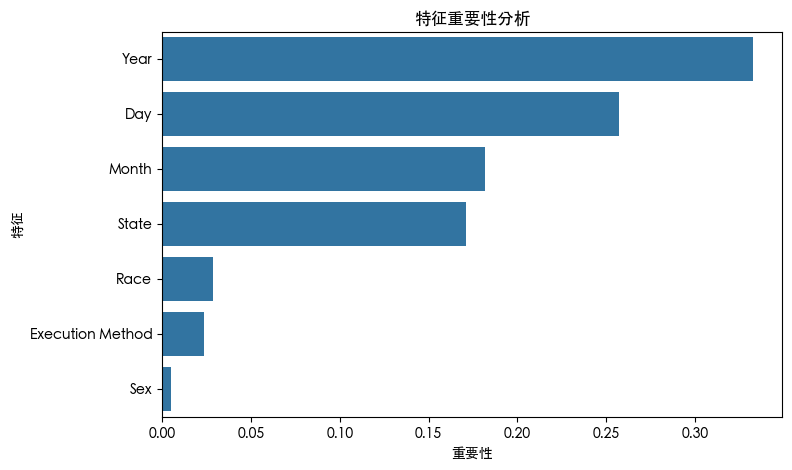

In [5]:
# 决策树预测Crimes Committed（0或1）

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
plt.rcParams['font.family'] = 'Heiti TC'  # 替换为你选择的字体
# 1. 选择特征和目标
features = ['Race', 'Execution Method', 'State', 'Sex', 'Year', 'Month', 'Day']
X = df[features]

y = df['Crimes Committed']

# 2. 处理缺失值（如有）
X = X.fillna(X.mean())

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 建立决策树模型并训练
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 5. 预测与评估
y_pred = dt_model.predict(X_test)
print("模型准确率:", accuracy_score(y_test, y_pred))
print("\n分类报告:\n", classification_report(y_test, y_pred))

# 6. 特征重要性可视化
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    '特征': features,
    '重要性': dt_model.feature_importances_
}).sort_values('重要性', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='重要性', y='特征', data=feature_importance)
plt.title('特征重要性分析')
plt.show()

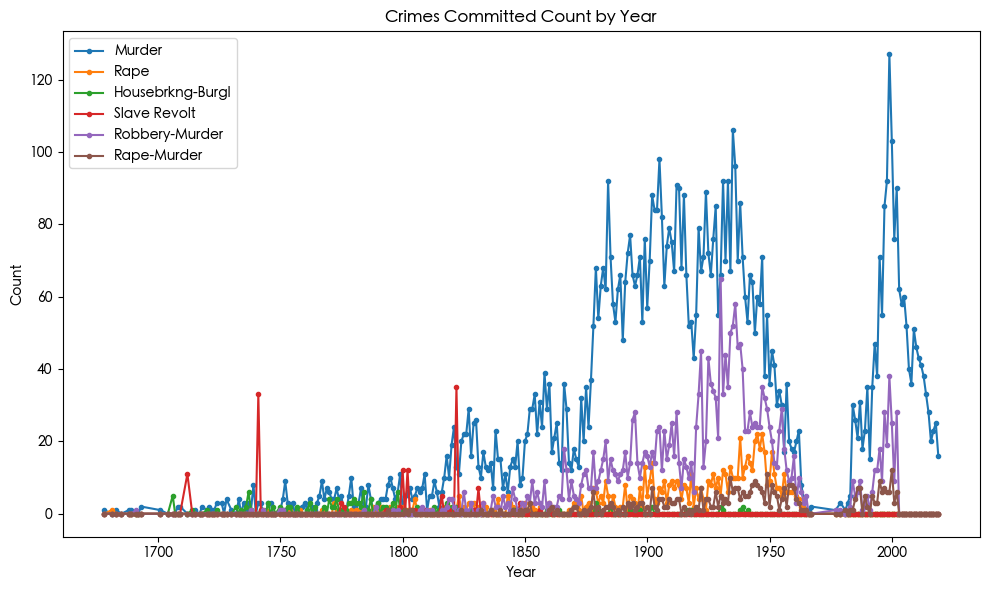

In [6]:
# 确保Date列为datetime类型
df['Date'] = pd.to_datetime(df['Date'])

# 按年份统计每年不同Crimes Committed的数量
df['Year'] = df['Date'].dt.year
crime_counts = df.groupby(['Year', 'Crimes Committed']).size().unstack(fill_value=0)

# 绘制曲线
plt.figure(figsize=(10, 6))
for crime_type in crime_counts.columns:
    if crime_counts[crime_type].sum() > 100:
        if crime_type == 1:
            crime_label = 'Murder'
        elif crime_type == 2:
            crime_label = 'Rape'
        elif crime_type == 4:
            crime_label = 'Housebrkng-Burgl'
        elif crime_type == 8:
            crime_label = 'Slave Revolt'
        elif crime_type == 10:
            crime_label = 'Robbery-Murder'
        elif crime_type == 11:
            crime_label = 'Rape-Murder'
        elif crime_type == 23:
            continue
        plt.plot(crime_counts.index, crime_counts[crime_type], marker='o', markersize=3, label=f'{crime_label}')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crimes Committed Count by Year')
plt.legend()
plt.tight_layout()
plt.savefig('../visualize/crimes_committed_count_by_year.png', dpi=600)
plt.show()


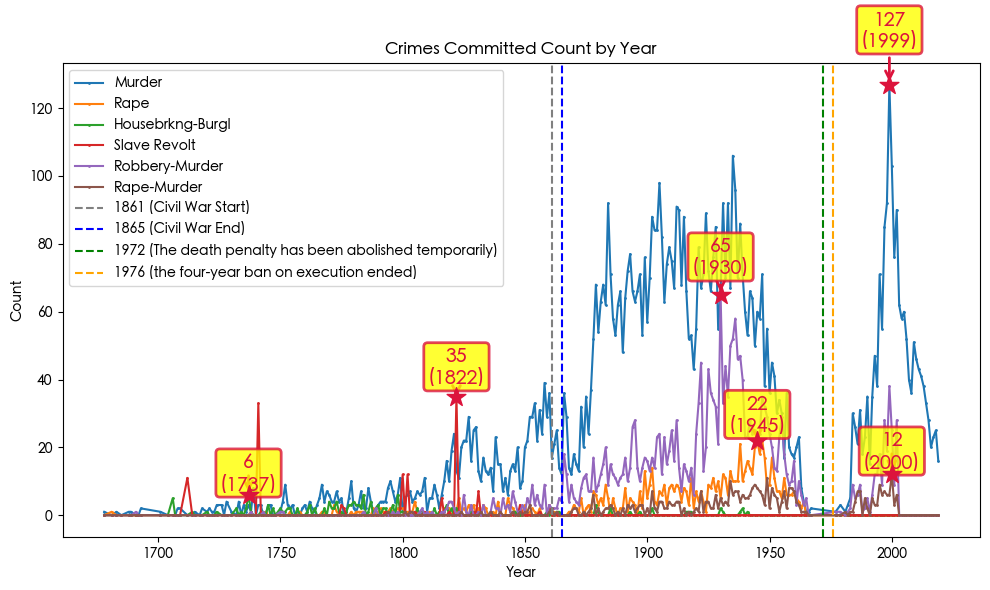

In [7]:
# 确保Date列为datetime类型
df['Date'] = pd.to_datetime(df['Date'])

# 按年份统计每年不同Crimes Committed的数量
df['Year'] = df['Date'].dt.year
crime_counts = df.groupby(['Year', 'Crimes Committed']).size().unstack(fill_value=0)

# 绘制曲线
plt.figure(figsize=(10, 6))
for crime_type in crime_counts.columns:
    if crime_counts[crime_type].sum() > 100:
        if crime_type == 1:
            crime_label = 'Murder'
        elif crime_type == 2:
            crime_label = 'Rape'
        elif crime_type == 4:
            crime_label = 'Housebrkng-Burgl'
        elif crime_type == 8:
            crime_label = 'Slave Revolt'
        elif crime_type == 10:
            crime_label = 'Robbery-Murder'
        elif crime_type == 11:
            crime_label = 'Rape-Murder'
        elif crime_type == 23:
            continue
        plt.plot(crime_counts.index, crime_counts[crime_type], marker='o', markersize=1, label=f'{crime_label}')
        # 找到最高点
        ymax = crime_counts[crime_type].max()
        xmax = crime_counts[crime_type].idxmax()
        # 用五角星标记最高点
        plt.scatter(xmax, ymax, color='crimson', marker='*', s=200, zorder=5)
        # 标注最高点
        plt.annotate(
            f'{ymax}\n({xmax})',
            xy=(xmax, ymax),
            xytext=(xmax, ymax + ymax * 0.08),
            arrowprops=dict(facecolor='crimson', edgecolor='crimson', arrowstyle='->', lw=2),
            ha='center',
            va='bottom',
            color='crimson',
            fontsize=14,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', ec='crimson', lw=2, alpha=0.8)
        )
# 添加垂直线
plt.axvline(x=1861, color='gray', linestyle='--', linewidth=1.5, label='1861 (Civil War Start)')
plt.axvline(x=1865, color='blue', linestyle='--', linewidth=1.5, label='1865 (Civil War End)')
plt.axvline(x=1972, color='green', linestyle='--', linewidth=1.5, label='1972 (The death penalty has been abolished temporarily)')
plt.axvline(x=1976, color='orange', linestyle='--', linewidth=1.5, label='1976 (the four-year ban on execution ended)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crimes Committed Count by Year')
plt.legend()
plt.tight_layout()
plt.savefig('../visualize/crimes_committed_count_by_year_with_highlights.png', dpi=600)
plt.show()

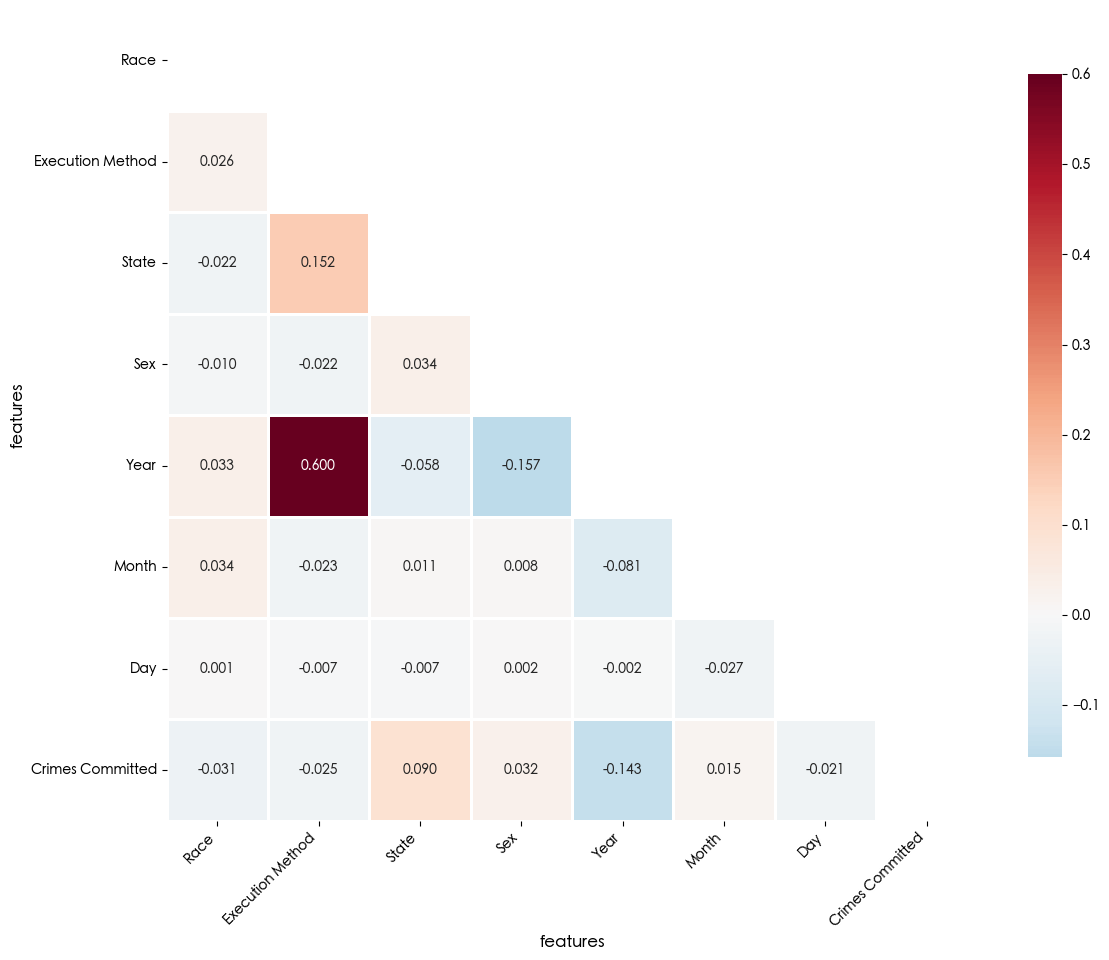

In [8]:
# 创建数值特征的相关性热力图（美化版）
plt.figure(figsize=(12, 10))

# 创建相关性矩阵
correlation_matrix = df[['Race', 'Execution Method', 'State', 'Sex', 'Year', 'Month', 'Day', 'Crimes Committed']].corr()

# 创建mask用于只显示下三角
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 设置阈值，突出显示高相关性
high_corr_threshold = 0.3
abs_corr = np.abs(correlation_matrix)

# 自定义颜色映射
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# 绘制热力图
ax = sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap=cmap,
                center=0,
                square=True, 
                linewidths=1.5,
                cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
                fmt='.3f',
                annot_kws={'size': 11, 'weight': 'bold', 'color': 'black'},
                vmin=-1, vmax=1)

# 设置标题和标签
plt.title('Feature Correlation Matrix', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Features', fontsize=12, fontweight='bold', labelpad=10)

# 调整刻度标签
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# 添加网格线
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# 调整布局并保存
plt.tight_layout()
plt.savefig('../visualize/correlation_heatmap_enhanced.png', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()


In [9]:
set(df['Race'])

{1, 2, 3, 4, 5, 6}

In [31]:
df['murder'] = (df['Crimes Committed'] == 1).astype(int)
df['rape'] = (df['Crimes Committed'] == 2).astype(int)
df['Housebrkng-Burgl'] = (df['Crimes Committed'] == 4).astype(int)
df['Treason'] = (df['Crimes Committed'] == 7).astype(int)
df['Slave Revolt'] = (df['Crimes Committed'] == 8).astype(int)
df['Robbery-Murder'] = (df['Crimes Committed'] == 10).astype(int)
df['Rape-Murder'] = (df['Crimes Committed'] == 11).astype(int)
df['Horse Stealing'] = (df['Crimes Committed'] == 5).astype(int)
df['Witchcraft'] = (df['Crimes Committed'] == 9).astype(int)
df['Attempted Rape'] = (df['Crimes Committed'] == 22).astype(int)
df['Aid Runaway Slve'] = (df['Crimes Committed'] == 37).astype(int)


df['White'] = (df['Race'] == 1).astype(int)
df['Black'] = (df['Race'] == 2).astype(int)
df['Native American'] = (df['Race'] == 3).astype(int)
df['Asian'] = (df['Race'] == 4).astype(int)

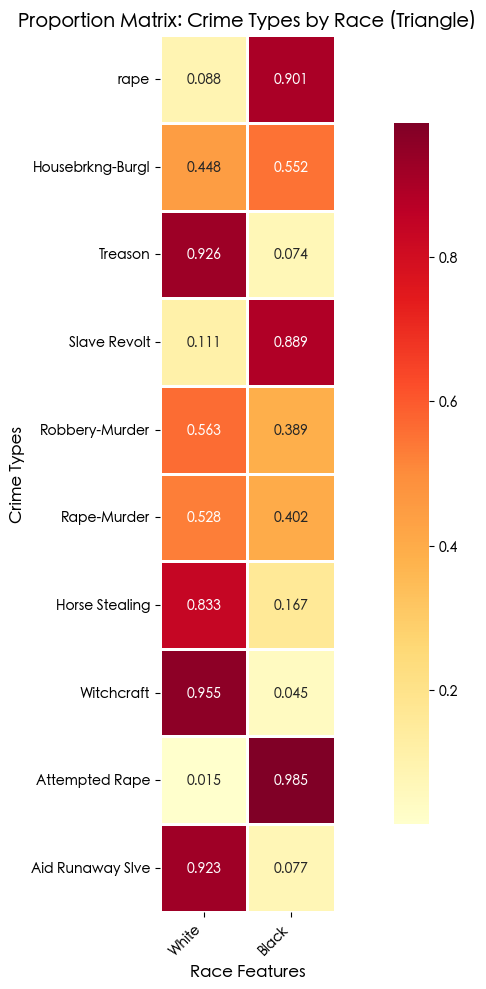

Crime-Race Proportion Matrix (Triangle):
                     White     Black
rape              0.087829  0.900878
Housebrkng-Burgl  0.448052  0.551948
Treason           0.925926  0.074074
Slave Revolt      0.111111  0.888889
Robbery-Murder    0.562579  0.388959
Rape-Murder       0.528037  0.401869
Horse Stealing    0.833333  0.166667
Witchcraft        0.954545  0.045455
Attempted Rape    0.015152  0.984848
Aid Runaway Slve  0.923077  0.076923


In [32]:
# 创建数值特征的相关性热力图（美化版）
plt.figure(figsize=(12, 10))

# 定义两组列
crime_columns = ['rape', 'Housebrkng-Burgl', 'Treason', 'Slave Revolt', 'Robbery-Murder', 'Rape-Murder', 'Horse Stealing',
                 'Witchcraft', 'Attempted Rape', 'Aid Runaway Slve']
other_features = ['White', 'Black']

# 计算每个犯罪类型与种族特征相等的数量
count_matrix = []
for crime in crime_columns:
    crime_counts = []
    total_count = (df[crime] == 1).sum()
    for race in other_features:
        # 计算两列相等且都为1的数量（即该种族犯该罪的数量）
        equal_count = ((df[crime] == 1) & (df[race] == 1)).sum()
        crime_counts.append(equal_count/total_count)
    count_matrix.append(crime_counts)

# 转换为DataFrame
count_df = pd.DataFrame(count_matrix, 
                       index=crime_columns, 
                       columns=other_features)

# 创建mask用于显示下三角
#mask = np.triu(np.ones_like(count_df, dtype=bool))

# 绘制三角热力图
ax = sns.heatmap(count_df,
                #mask=mask,
                annot=True,
                cmap='YlOrRd',  # 使用暖色系
                square=True,
                linewidths=1,
                cbar_kws={"shrink": .8},
                fmt='.3f',
                annot_kws={'size': 10, 'weight': 'bold'})

plt.xlabel('Race Features', fontsize=12, fontweight='bold')
plt.ylabel('Crime Types', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Proportion Matrix: Crime Types by Race (Triangle)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualize/triangle_matrix_crime_vs_race.png', dpi=600, bbox_inches='tight')
plt.show()

# 输出统计信息
print("Crime-Race Proportion Matrix (Triangle):")
print(count_df)


In [ ]:
df_sla = df[df['Crimes Committed'] == 8].copy()
df_sla[df_sla['Slave Revolt'] == df_sla['Black']]

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed,Date,murder,...,Housebrkng-Burgl,Treason,Slave Revolt,Robbery-Murder,Rape-Murder,Horse Stealing,White,Black,Native American,Asian
1578,2,1,1,1,1860,10,19,8,1860-10-19,0,...,0,0,1,0,0,0,0,1,0,0
1579,2,1,1,1,1860,10,19,8,1860-10-19,0,...,0,0,1,0,0,0,0,1,0,0
1580,2,1,1,1,1860,10,19,8,1860-10-19,0,...,0,0,1,0,0,0,0,1,0,0
3869,2,1,13,1,1819,5,17,8,1819-05-17,0,...,0,0,1,0,0,0,0,1,0,0
5298,2,1,21,1,1848,10,28,8,1848-10-28,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
12431,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
12432,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
12433,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
